In [1]:

import numpy.typing as npt
from matplotlib import pyplot as plt

import spectrum_painting_data as sp_data
import spectrum_painting_training as sp_training


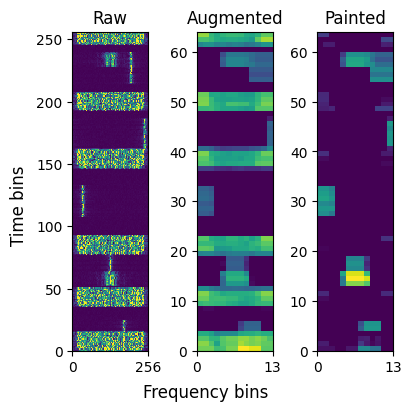

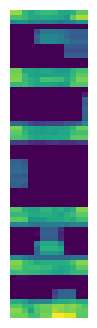

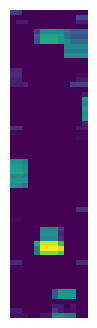

In [47]:
from training.spectrum_painting import augment_spectrogram, downsample_spectrogram, paint_spectrogram

classes = ["ZBW"]
spectrum_painting_options = sp_training.SpectrumPaintingTrainingOptions(
    downsample_resolution=64,
    k=3,
    l=16,
    d=4
)

spectrograms = sp_data.load_spectrograms(data_dir="data/numpy",
                                         classes=classes,
                                         snr_list=[30],
                                         windows_per_spectrogram=256,
                                         window_length=256,
                                         nfft=256)

spec = spectrograms.get(30)[0].values

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(4, 4), constrained_layout=True)


def plot_spectrogram(spectrogram: npt.NDArray, index: int, name: str):
    n = spectrogram.shape[0]
    plt.subplot(1, 3, index)
    plt.pcolormesh(spectrogram)
    plt.title(name)
    plt.xticks((0, spectrogram.shape[1]))
    plt.xticks()


plot_spectrogram(spec.clip(max=0.04), index=1, name="Raw")

downsampled = downsample_spectrogram(spectrogram=spec, resolution=64)

augmented = augment_spectrogram(spectrogram=downsampled, k=3, l=16, d=4)
plot_spectrogram(augmented, index=2, name="Augmented")

painted = paint_spectrogram(downsampled, augmented)
plot_spectrogram(painted, index=3, name="Painted")

# fig.tight_layout()
fig.supxlabel("Frequency bins")
fig.supylabel("Time bins")
plt.show()

plt.figure(figsize=(1, 4))
plt.pcolormesh(augmented)
plt.axis("off")
plt.yticks(None)
plt.show()

plt.figure(figsize=(1, 4))
plt.pcolormesh(painted)
plt.axis("off")
plt.yticks(None)
plt.show()